# Imports

In [ ]:
# import sys
# !{sys.executable} -m pip install librosa, numpy

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import librosa as lr
from IPython.display import Audio

# STFT

In diesem Notebook wird die STFT implementiert.

Dafür kann die implementierte DFT-Funktion `calc_dft` verwendet werden:

In [4]:
def calc_dft(x):

    N = x.size
    n = np.arange(N)

    dft = np.zeros((N,), dtype=complex)

    for k in range(N):
        e = np.exp(-1j * 2 * np.pi * n * k / N)
        dft[k] = np.sum(x * e)

    return dft

<div style="background-color:lightyellow;border:solid lightgrey;padding:10px">

**Aufgabe:**

Implementiert die Funktion `calc_stft`

*Tipps:*
- Erinnert euch an die Methode des Time-Framings.
- Die Ergebnisse der STFT sollen in einer Matrix (= multidimensionaler Array) gespeichert werden (siehe nächster Code-Block) --> Es bietet sich also an, einen leeren Array `stft` zu erstellen, in den man dann im Loop jeweils die Ergebnisse schreibt.
- `stft` muss also so viele Zeilen haben, wie das Fenster lang ist (`window_size`) und so viele Spalten haben, wie viele Fenster insgesamt berechnet werden (`num_wins`)
- Da das Ergebnis der DFT komplexe Zahlen liefert, muss man mit dem `dtype`-keyword beim Erstellen des (numpy-)Arrays `complex` angeben.
- Innerhalb des Loops soll pro Fenster jeweils die DFT berechnet werden (verwende hierfür `calc_dft` oder `np.fft.fft` nach Belieben). Diese DFT soll dann in die jeweilige Spalte der `stft`-Matrix geschrieben werden --> hilfreich: mit `a[start_y:stop_y, start_x:stop_x]` einen bestimmten Ausschnitt einer gegebenen Matrix (hier `a`) referenzieren.

</div>

In [ ]:
# f --> frequenz index
# t --> zeit index

np.array([['f0 t0', 'f0 t1', 'f0 t2', 'f0 t3', 'f0 t4', '...'], # freq_coef 0
          ['f1 t0', 'f1 t1', 'f1 t2', 'f1 t3', 'f1 t4', '...'], # freq_coef 1
          ['f2 t0', 'f2 t1', 'f2 t2', 'f2 t3', 'f2 t4', '...'], # freq_coef 2
          ['f3 t0', 'f3 t1', 'f3 t2', 'f3 t3', 'f3 t4', '...'], # freq_coef 3
          ['f4 t0', 'f4 t1', 'f4 t2', 'f4 t3', 'f4 t4', '...'], # freq_coef 4
          ['...',   '...',   '...',   '...',   '...',   '...']]) # ...
#           win 0    win 1    win 2    win 3    win 4    ...

In [ ]:
307411

In [32]:
print(x.size)
hop_size = 200
window_size = 500
num_windows = x.size // hop_size
print(num_windows)


total_needed_samples = ((num_windows - 1) * hop_size) + window_size
print(total_needed_samples)

needed_samples = total_needed_samples - x.size
print(needed_samples)

x = np.concatenate([x, np.zeros(needed_samples)])

307411
1537
307700
289


In [34]:
sr

44100

In [33]:
x.size

307700

In [60]:
stft = np.zeros((3, 5))
print(stft, '\n')

print(stft[0:4, 0], '\n')

stft[:, 0] = np.array([1, 2, 3])

print(stft)

[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]] 

[0. 0. 0.] 

[[1. 0. 0. 0. 0.]
 [2. 0. 0. 0. 0.]
 [3. 0. 0. 0. 0.]]


In [69]:
stft = np.zeros((5, 3))
print(stft, '\n')

stft[0] = np.array([1, 2, 3])
print(stft, '\n')

stft = stft.T
print(stft, '\n')

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]] 

[[1. 2. 3.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]] 

[[1. 0. 0. 0. 0.]
 [2. 0. 0. 0. 0.]
 [3. 0. 0. 0. 0.]] 



In [72]:
def calc_stft_pluseins(x, hop_size=200, window_size=500):

    num_wins = ((x.size - window_size) // hop_size) + 1

    stft = np.zeros((window_size, num_windows), dtype=complex)

    for i in range(num_wins):

        start_i = i * hop_size
        stop_i = start_i + window_size
        window = x[start_i:stop_i]
        dft = calc_dft(window)
        stft[:, i] = dft

    return stft

In [70]:
def calc_stft(x, hop_size=200, window_size=500):

    num_wins = x.size // hop_size

    # zero-padding
    total_needed_samples = ((num_windows - 1) * hop_size) + window_size
    needed_samples = total_needed_samples - x.size
    x = np.concatenate([x, np.zeros(needed_samples)])

    stft = np.zeros((window_size, num_windows), dtype=complex)

    for i in range(num_wins):

        start_i = i * hop_size
        stop_i = start_i + window_size
        window = x[start_i:stop_i]
        dft = calc_dft(window)
        stft[:, i] = dft

    return stft

In [ ]:
def calc_stft_easy_index(x, hop_size=200, window_size=500):

    num_wins = x.size // hop_size

    # zero-padding
    total_needed_samples = ((num_windows - 1) * hop_size) + window_size
    needed_samples = total_needed_samples - x.size
    x = np.concatenate([x, np.zeros(needed_samples)])

    stft = np.zeros((window_size, num_windows), dtype=complex)

    for i in range(num_wins):

        # ...
        pass

    return 0

Jetzt kann die STFT berechnet und geplottet werden:

/var/folders/kq/3x7sbzmx3h55843f4sbv7m240000gn/T/ipykernel_32398/3183017136.py:20: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(10 * np.log10(np.abs(stft)), aspect='auto', origin='lower', extent=[0, length, 0, sr])


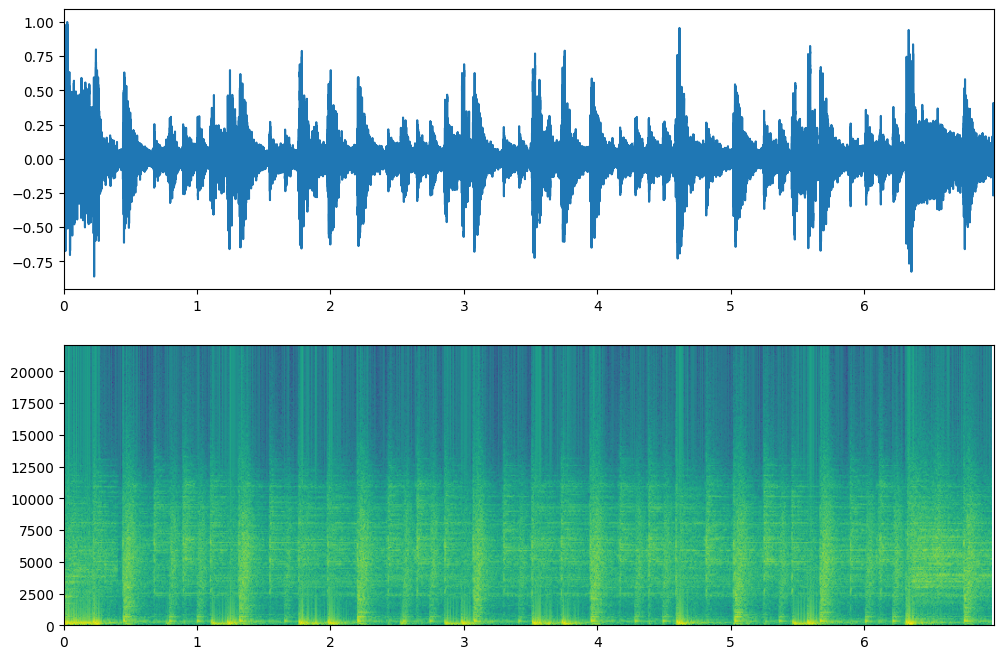

In [74]:
x, sr = lr.load('/Users/danielhopfner/Downloads/Amen-break/Amen-break.wav', sr=None)

# stft = calc_stft(x)

stft = calc_stft_pluseins(x)

display(Audio(x, rate=sr))

# plot
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
length = x.size / sr
t = np.linspace(0, length, x.size)
plt.plot(t, x)
plt.xlim(0, length)

plt.subplot(2, 1, 2)
# to dB
plt.imshow(10 * np.log10(np.abs(stft)), aspect='auto', origin='lower', extent=[0, length, 0, sr])
plt.ylim(0, sr / 2)

plt.show()

Überlegung: Was passiert, wenn man verschiedene window-sizes und hop_lengths verwendet?

In [ ]:
# ausführen dieses code-blocks kann ein bisschen dauern
# in stft-funktion lieber np.fft.fft verwenden
window_sizes = [50, 200, 800, 2400, 4800]
for window_size in window_sizes:

    hop_sizes = [window_size / 4, window_size / 2]
    for hop_size in hop_sizes:

        stft = calc_stft(x, hop_size=int(hop_size), window_size=int(window_size))

        print('hop_size:\t%d\nwindow_size:\t%d' % (hop_size, window_size))
        # plot
        plt.figure(figsize=(12, 8))

        plt.subplot(2, 1, 1)
        length = x.size / sr
        t = np.linspace(0, length, x.size)
        plt.plot(t, x)
        plt.xlim(0, length)

        plt.subplot(2, 1, 2)
        # to dB
        plt.imshow(10 * np.log10(np.abs(stft)), aspect='auto', origin='lower', extent=[0, np.shape(x)[0] / sr, 0, sr])
        plt.ylim(0, sr / 2)
        plt.show()